In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sobol_seq
from scipy.optimize import minimize
from CartPole import CartPole

# Task 2.4

In [ ]:
#Kernel Function 
def kernel_func(x0,x1,sig):
    delta_x = x0-x1
    delta_x_2 = np.zeros([4,1])
    for i in range(4):
        delta_x_2[i]=(delta_x[i])**2
    delta_x_2[2]=np.sin(0.5*(delta_x[2]))**2
    expo = (-0.5)*float(np.dot(sig, delta_x_2))
    kernel = np.e**expo
    return kernel
#range of input for creating data
def r_range(i, minimum,maximum):
    d = i*(maximum-minimum)
    output = np.full(np.shape(i),minimum)+d
    return output
#generate datapoints using sobol_seq
def generate_x(n):
    x_data = sobol_seq.i4_sobol_generate(4,n)
    d_0=r_range(x_data[:,0],-50,50)
    d_1=r_range(x_data[:,1],-10,10)
    d_2=r_range(x_data[:,2],-(np.pi),np.pi)
    d_3=r_range(x_data[:,3],-15,15)
    output = np.column_stack((d_0,d_1,d_2,d_3))
    return output
def K_matrix(a,b,sig_invert):
    A = np.shape(a)[0]
    B = np.shape(b)[0]
    K = np.zeros(shape=(A,B))
    for i in range(A):
        for j in range(B):
            K[i][j] =kernel_func(a[i],b[j],sig_invert)
    return K

x= CartPole()
N =500
M = 200
sigma =[2.63690e-16,1.6274e-06, 2.6313, 1.3831e-02, 2.464e-04]
X = generate_x(N)
X_M = generate_x(M)
lamda = 1e-4
# generate a Nx4 matrix
# generate corresponding y
Y = np.zeros(shape=(N,4))
for i in range(N):
    x.setState(X[i,:4])
    x.performAction(X[i,-1])
    Y[i] = x.getState() - X[i,:4]

KNN = K_matrix(X,X, sigma)
KMN = K_matrix(X_M, X, sigma)
KNM = K_matrix(X, X_M, sigma)
KMM = K_matrix(X_M, X_M, sigma)
#alpha = (KMN@KNM + lamda*KMM)^-1(KMN@Y)
#alpha = (c)^-1*(d)
c = KMN @ KNM +lamda*KMM
d = np.zeros([4,M])
matrix_alphas = np.zeros([4,M])
for i in range(4):
    d[i] = KMN @ Y_change_State[:,i]
    matrix_alphas[i]=np.linalg.lstsq(c,d[i],rcond=-1)[0]
def model_pred_control(p):
    CartpoleState.setState([0, 0, 0.1, 0])
    pred = np.zeros(shape=(15,5))
    l = 0

    for i in range(15):
        l += CartpoleState.loss()
        f = np.dot(p, CartpoleState.getState())
        pred[i, :4] = CartpoleState.getState()
        pred[i, -1] = f
        K1M = np.array([kernel_func(pred[i], s,sigma) for s in X_M])
        c = K1M @ matrix_alphas.transpose()
        new_pred = c + pred[i,:4]
        CartpoleState.setState(new_pred)
        CartpoleState.remap_angle()
    return l


### Visualizing Minimums

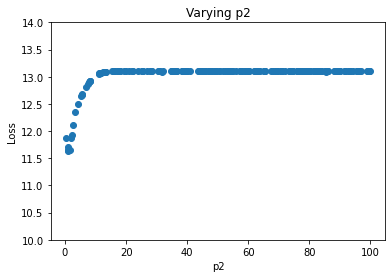

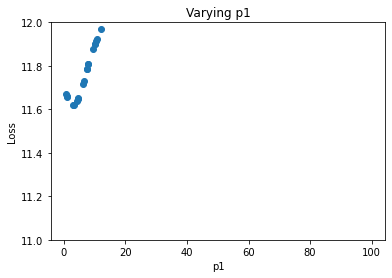

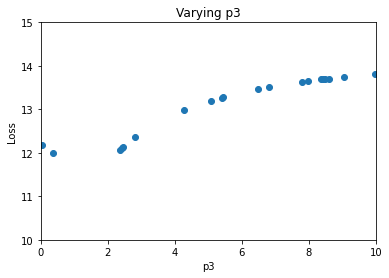

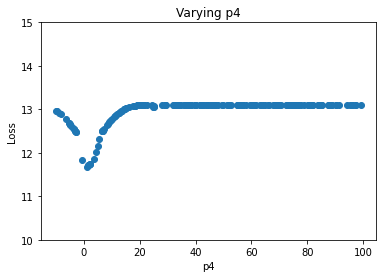

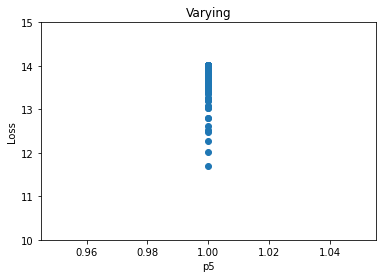

In [ ]:
n_s = 200
l = np.zeros([n_s,1])
p_cl=np.zeros([n_s,4])
for i in range(n_s):
    p1 = [np.random.uniform(0,100),1,1,1]
    p_cl[i] = p1
    l[i]=model_pred_control(p1)
l_cv = np.zeros([n_s,1])
p_cv=np.zeros([n_s,4])
for i in range(n_s):
    p2 = [1,np.random.uniform(0,100),1,1]
    p_cv[i] = p2
    l_cv[i]=model_pred_control(p2)
plt.scatter(p_cv[:,1],l_cv)
plt.ylim(10,14)
plt.xlabel('p2')
plt.ylabel('Loss')
plt.title('Varying p2')
plt.show()

plt.scatter(p_cl[:,0],l)
plt.ylim(11,12)
plt.xlabel('p1')
plt.ylabel('Loss')
plt.title('Varying p1')
plt.show()

l_pa = np.zeros([n_s,1])
p_pa=np.zeros([n_s,4])
for i in range(n_s):
    p3 = [1,1,np.random.uniform(-10,100),1]
    p_pa[i] = p3
    l_pa[i]=model_pred_control(p3)

plt.scatter(p_pa[:,2],l_pa)
plt.ylim(10,15)
plt.xlim(0,10)
plt.xlabel('p3')
plt.ylabel('Loss')
plt.title('Varying p3')
plt.show()

l_pv = np.zeros([n_s,1])
p_pv=np.zeros([n_s,4])
for i in range(n_s):
    p4 = [1,1,1,np.random.uniform(-10,100),]
    p_pv[i] = p4
    l_pv[i]=model_pred_control(p4)

plt.scatter(p_pv[:,3],l_pv)
plt.ylim(10,15)
plt.xlim()
plt.xlabel('p4')
plt.ylabel('Loss')
plt.title('Varying p4')
plt.show()

l_clcv = np.zeros([n_s,1])
p_clcv=np.zeros([n_s,4])
for i in range(n_s):
    p5 = [np.random.uniform(-10,100),1,np.random.uniform(-10,100),1]
    p_clcv[i] = p5
    l_clcv[i]=model_pred_control(p5)
plt.scatter(p_clcv[:,3],l_clcv)
plt.ylim(10,15)
plt.xlim()
plt.xlabel('p5')
plt.ylabel('Loss')
plt.title('Varying')
plt.show()

### Optimizing parameters

In [ ]:
p_1 = [8.9,12,123,21]

# x0 = np.array([ 2.02341039,  3.2269465 , 74.44066079, 11.26992476])
# [-3.35802526,  4.51585084, 75.99296052, 13.08667829] 
# [-27.31719334,  20.01673045,  27.35351323,  29.13319048] 
# [ -0.56636693,  13.40674337, 102.23761576,  24.65008773] 
# [  8.86874351,  12.5770018 , 118.85806506,  22.32026644] 

# 0.2
# [ 5.87200144,  6.43440688, 98.36793522, 15.06893969]
# [  8.93643704,  12.10589224, 122.87328005,  21.14929645] 
# [-3.35802526,  4.51585084, 75.99296052, 13.08667829]
# [ 2.02341039,  3.2269465 , 74.44066079, 11.26992476]
# [8.93643704,12.10589224, 122.87328005, 21.14929645] shit
# [  9.17738003,  13.08738512, 126.78887521,  22.21989672] shit
res = minimize(model_pred_control, p_1, method='nelder-mead',
               options={'maxiter':3000,'xatol': 1e-5, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 14.019801
         Iterations: 21
         Function evaluations: 125
[  8.9  12.  123.   21. ]


### Plot Time Evolution

In [ ]:

def plot_evolution_policy(n, p):
    CartpoleState = CartPole()
    #Different intial states
    init_state_array = np.array([[0, 0, 0.2, 0],[0, 0, 0.12, 0], [0, 0, 0.1, 0], [0, 0, 0.15, 0]])

    x0 = np.zeros([4,n])
    x1 = np.zeros([4,n])
    x2 = np.zeros([4,n])
    x3 = np.zeros([4,n])
    x4 = np.zeros([4,n])

    index = 0
    for init in init_state_array:
        CartpoleState.setState(init)
        l = 0
        for i in range(n):
            cur_state = CartpoleState.getState()
            x0[ind][i], x1[ind][i], x2[ind][i], x3[ind][i] = cur_state[0], cur_state[1], cur_state[2], cur_state[3]
            l += CartpoleState.loss()
            f = np.dot(p, CartpoleState.getState())
            x4[ind][i] = f
            K1M_pred = np.array([kernel_gauss(np.array([x0[ind][i], x1[ind][i], x2[ind][i], x3[ind][i],x4[ind][i]]), sset, one_over_sigma) for sset in Xs])
            c = K1M_pred @ matrix_alphas.transpose()
            new_pred = c + cur_state
            CartpoleState.setState(new_pred)
            CartpoleState.remap_angle()
        index += 1
    X = np.array([x0, x1, x2, x3, x4])


    fig1, axs1 = plt.subplots(4,figsize=(10,5))
    fig1.suptitle('Time evolution of variables')

    time = np.arange(0, 0.2*n, 0.2)
    states = ["location", "velocity", "pole angle", "pole velocity"]

    index = 0
    for i in range(4):
        axs1[i].plot(time, X[index][0], color='royalblue',label = '[0, 0.2, 0, 0]')
        axs1[i].plot(time, X[index][2], color='red' ,label = '[0, 0, 0.1, 0]')
        axs1[i].plot(time, X[index][3],color = 'black', label = '[0, 0, 0.15, 0')
        axs1[i].set(xlabel="Time")
        axs1[i].set(ylabel=states[index])
        index += 1
    axs1[0].legend(bbox_to_anchor=(1.1, 1.3), loc='upper right')
    plt.show()

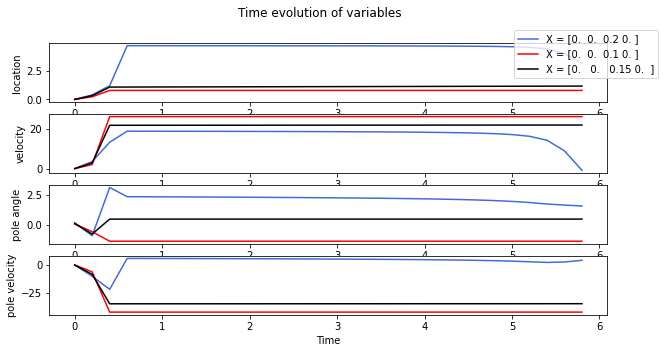

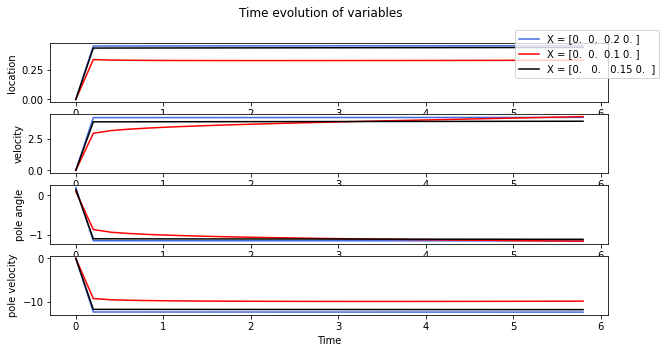

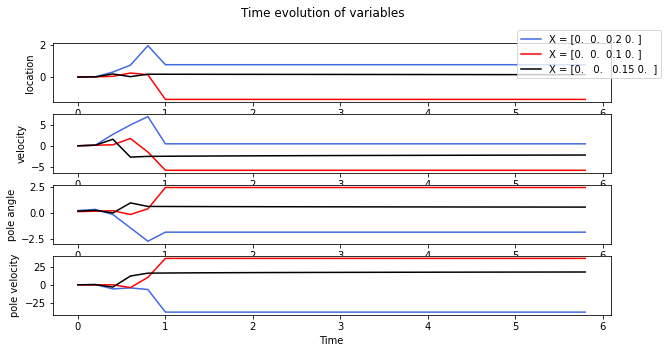

In [ ]:

plot_evolution_policy(30,[2,3,78,11])
plot_evolution_policy(30,res.x)
plot_evolution_policy(30,[64.55803217, 8.25290263,1.10774183, 16.46884571])
#[2,3,78,11]
#[24.1498626  18.42980936  1.10772824 26.2491273 ]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=180073fb-9c10-447b-b721-e7b1d25fe36a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>